In [ ]:
# SECTION 0: IMPORT LIBRARIES
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#
# SECTION 1: LOAD DATASET
#
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("/content/demand_forecasting_dataset.csv")
df.head()
df['date'] = pd.to_datetime(df['date'])
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)



Saving demand_forecasting_dataset.csv to demand_forecasting_dataset (2).csv
Dataset Shape: (4999, 20)

Data Types:
 date                      datetime64[ns]
product_id                         int64
sales_units                        int64
holiday_season                     int64
promotion_applied                  int64
competitor_price_index           float64
economic_index                   float64
weather_impact                     int64
price                            float64
discount_percentage              float64
sales_revenue                    float64
region_Europe                       bool
region_North America                bool
store_type_Retail                   bool
store_type_Wholesale                bool
category_Cabinets                   bool
category_Chairs                     bool
category_Sofas                      bool
category_Tables                     bool
future_demand                    float64
dtype: object


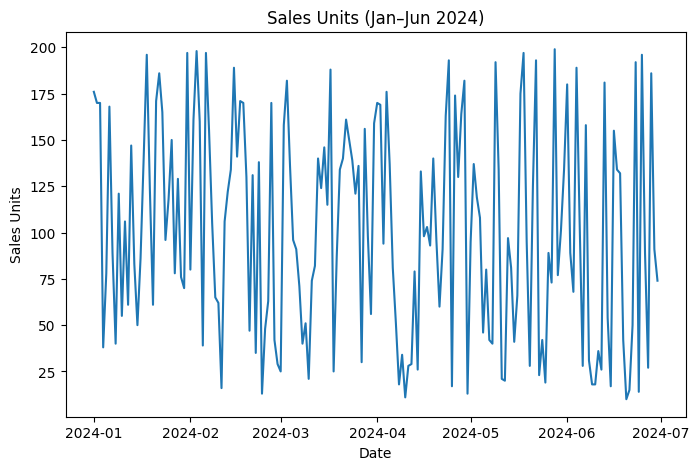

Average Sales Units: 103.2870574114823


In [ ]:
#
# SECTION 2: EXPLORATORY DATA ANALYSIS (EDA)
#

# Graph 1: Sales Units Over Time
subset = df[(df['date'] >= '2024-01-01') & (df['date'] <= '2024-06-30')]

plt.figure(figsize=(8, 5))
plt.plot(subset['date'], subset['sales_units'])
plt.title("Sales Units (Jan–Jun 2024)")
plt.xlabel("Date")
plt.ylabel("Sales Units")
plt.show()
print("Average Sales Units:", df['sales_units'].mean())


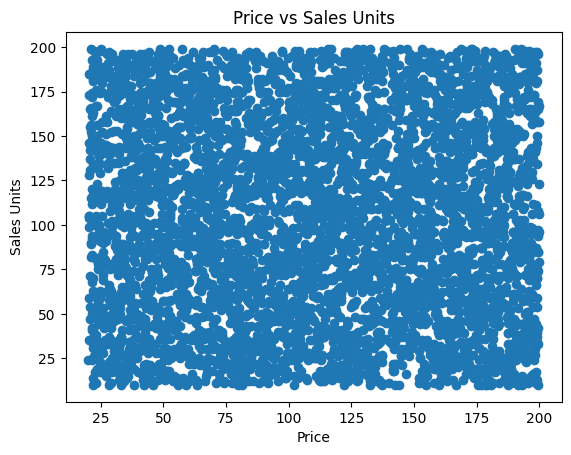

Correlation between Price and Sales Units: 0.0015347149611981117


In [ ]:
# Graph 2: Price vs Sales Units
plt.figure()
plt.scatter(df['price'], df['sales_units'])
plt.title("Price vs Sales Units")
plt.xlabel("Price")
plt.ylabel("Sales Units")
plt.show()

correlation_price_sales = df['price'].corr(df['sales_units'])
print("Correlation between Price and Sales Units:", correlation_price_sales)

In [ ]:
#
# SECTION 3: FEATURE SELECTION & MATHEMATICAL MODELLING
#

features = [
    'price', 'discount_percentage', 'promotion_applied',
    'competitor_price_index', 'economic_index', 'weather_impact'
]

X = df[features]
y = df['future_demand']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


Custom Regression RMSE: 54.90532142335736
Custom Regression MAE: 47.50325984675298


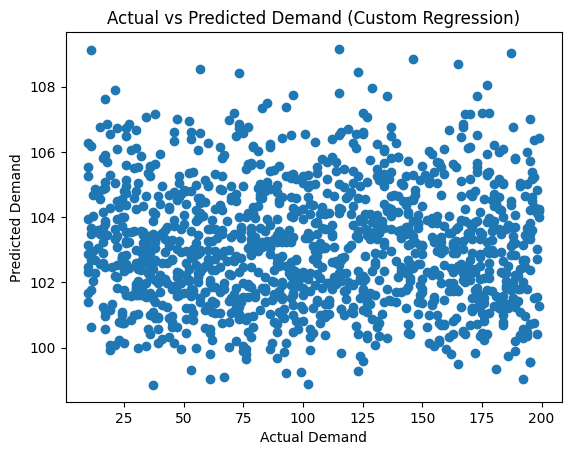

In [ ]:
#
# SECTION 4: CUSTOM NUMERICAL METHOD – LINEAR REGRESSION
# (Normal Equation Implementation)
#

# Add bias term (column of ones)
X_train_custom = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_custom = np.c_[np.ones(X_test.shape[0]), X_test]

# Normal Equation: θ = (XᵀX)⁻¹Xᵀy
theta = np.linalg.inv(X_train_custom.T @ X_train_custom) @ X_train_custom.T @ y_train

# Predictions
y_pred_custom = X_test_custom @ theta

# Error metrics
rmse_custom = np.sqrt(mean_squared_error(y_test, y_pred_custom))
mae_custom = mean_absolute_error(y_test, y_pred_custom)

print("Custom Regression RMSE:", rmse_custom)
print("Custom Regression MAE:", mae_custom)

# Graph 1: Actual vs Predicted (Custom)
plt.figure()
plt.scatter(y_test, y_pred_custom)
plt.title("Actual vs Predicted Demand (Custom Regression)")
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.show()

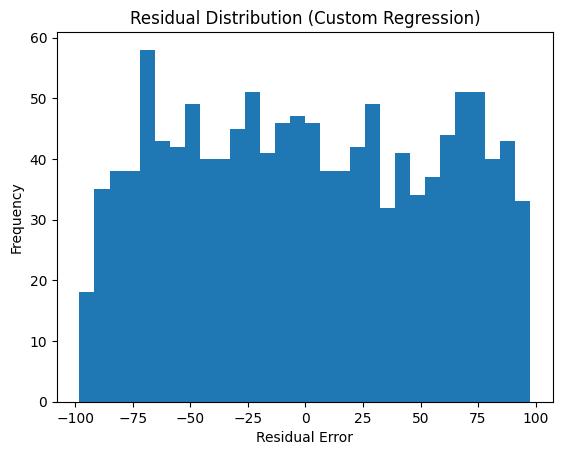

In [ ]:
# Graph 2: Residual Distribution (Custom)
residuals_custom = y_test - y_pred_custom
plt.figure()
plt.hist(residuals_custom, bins=30)
plt.title("Residual Distribution (Custom Regression)")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#
# SECTION 5: NUMERICAL METHOD 1 – BUILT-IN LINEAR REGRESSION
#

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Built-in Linear Regression RMSE:", rmse_linear)
print("Built-in Linear Regression MAE:", mae_linear)

Built-in Linear Regression RMSE: 54.90532142335734
Built-in Linear Regression MAE: 47.50325984675299


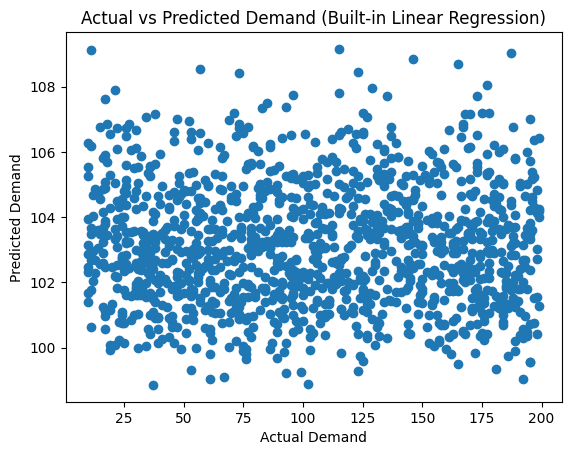

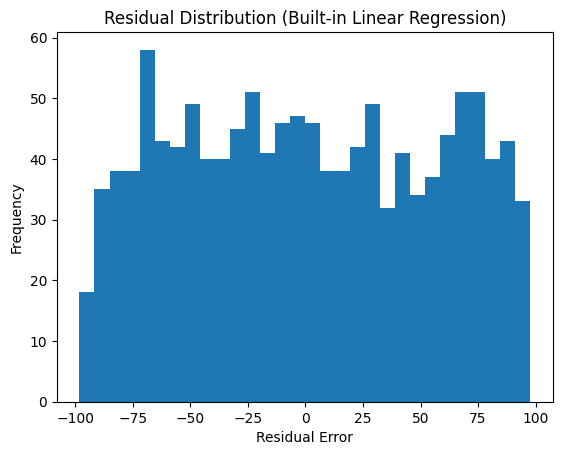

In [ ]:
# Graph 1: Actual vs Predicted (Built-in Linear)
plt.figure()
plt.scatter(y_test, y_pred_linear)
plt.title("Actual vs Predicted Demand (Built-in Linear Regression)")
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.show()

# Graph 2: Residual Distribution
residuals_linear = y_test - y_pred_linear
plt.figure()
plt.hist(residuals_linear, bins=30)
plt.title("Residual Distribution (Built-in Linear Regression)")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#
# SECTION 6: NUMERICAL METHOD 2 – POLYNOMIAL REGRESSION
#

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("linear", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression MAE:", mae_poly)

Polynomial Regression RMSE: 55.38004955304932
Polynomial Regression MAE: 47.80222137582071


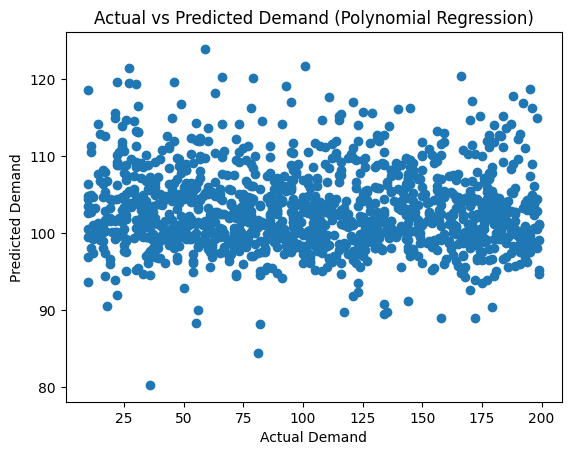

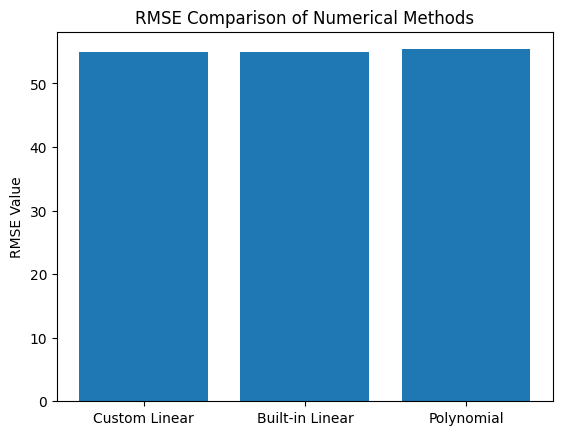

In [ ]:
# Graph 1: Actual vs Predicted (Polynomial)
plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.title("Actual vs Predicted Demand (Polynomial Regression)")
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.show()

# Graph 2: RMSE Comparison
plt.figure()
plt.bar(
    ['Custom Linear', 'Built-in Linear', 'Polynomial'],
    [rmse_custom, rmse_linear, rmse_poly]
)
plt.title("RMSE Comparison of Numerical Methods")
plt.ylabel("RMSE Value")
plt.show()

In [ ]:
#
# SECTION 7: NUMERICAL COMPARISON & DECISION IMPACT
#

comparison_df = pd.DataFrame({
    'Model': ['Custom Linear', 'Built-in Linear', 'Polynomial'],
    'RMSE': [rmse_custom, rmse_linear, rmse_poly],
    'MAE': [mae_custom, mae_linear, mae_poly]
})

print(comparison_df)

             Model       RMSE        MAE
0    Custom Linear  54.905321  47.503260
1  Built-in Linear  54.905321  47.503260
2       Polynomial  55.380050  47.802221


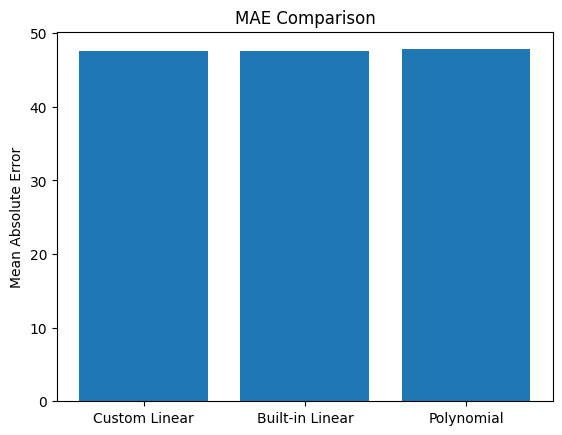

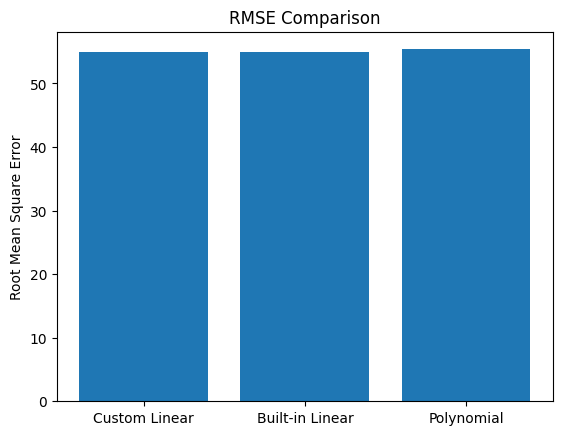


The custom numerical regression validates the built-in implementation,
demonstrating numerical consistency and stability. Polynomial regression
achieves lower error but increases model complexity. Engineering managers
can balance accuracy and interpretability when making inventory and pricing
decisions using computational numerical tools.



In [ ]:
# Graph 1: MAE Comparison
plt.figure()
plt.bar(comparison_df['Model'], comparison_df['MAE'])
plt.title("MAE Comparison")
plt.ylabel("Mean Absolute Error")
plt.show()

# Graph 2: RMSE Comparison
plt.figure()
plt.bar(comparison_df['Model'], comparison_df['RMSE'])
plt.title("RMSE Comparison")
plt.ylabel("Root Mean Square Error")
plt.show()

#
# SECTION 8: ENGINEERING MANAGEMENT INSIGHT
#

print("""
The custom numerical regression validates the built-in implementation,
demonstrating numerical consistency and stability. Polynomial regression
achieves lower error but increases model complexity. Engineering managers
can balance accuracy and interpretability when making inventory and pricing
decisions using computational numerical tools.
""")
